In [29]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_pickle("../data/pkl/merged_filtered_0620.pkl")

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6305834 entries, 1 to 114175
Data columns (total 24 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   뉴스 식별자             object
 1   일자                 int64 
 2   언론사                object
 3   기고자                object
 4   제목                 object
 5   통합 분류1             object
 6   통합 분류2             object
 7   통합 분류3             object
 8   사건/사고 분류1          object
 9   사건/사고 분류2          object
 10  사건/사고 분류3          object
 11  인물                 object
 12  위치                 object
 13  기관                 object
 14  키워드                object
 15  특성추출(가중치순 상위 50개)  object
 16  본문                 object
 17  URL                object
 18  분석제외 여부            object
 19  city               object
 20  filter_keyword     object
 21  year               int64 
 22  month              int64 
 23  day                int64 
dtypes: int64(4), object(20)
memory usage: 1.2+ GB


In [53]:
data[['']]

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,city,filter_keyword,year,month,day
1,1100201.199112,19911218,국민일보,김명호,경남 진해(“나요 나”/14대 격전 주자들),정치>국회_정당,정치>선거,정치>행정_자치,NaN,NaN,...,"경남,진해,주자들,격전,주자,이학봉,재판,무소속,공천,미지수,자신,김영일,관심표명중...","김전무,이의원,김해중,민자당,김은상,민주당,종친회,위원장,지역구,13대,무소속,김영...",◎이학봉/재판에 걸려 공천 미지수 “무소속도 자신”/김영일/관심표명중/오세호/“야 ...,NaN,NaN,김해시,"{지역, 주민들, 개최, 주민}",1991,12,18
2,1500701.201604,19911212,부산일보,부산일보,[사람],지역>대전,지역>부산,지역>충남,NaN,NaN,...,"사람,국제통상,주제,강연,전무,金殷湘,한국무역협회,11일,6시,강의실,부산대,경영,...","격려금,손목시계,국제통상,동구,원씩,慶南,金泉,머코스키,회의실,釜山日報社,근로자들,...",‘국제통상’ 주제 강연\n◇金殷湘 한국무역협회 전무=11일 오후 6시40분 부산대 ...,NaN,NaN,김해시,"{지역, 개최, 사업}",1991,12,12
3,1100611.201604,19911208,서울신문,NaN,농수산물 음성정보/74개 시 군으로 확대,IT_과학>인터넷_SNS,IT_과학>과학,IT_과학>모바일,NaN,NaN,...,"농수산물,음성,정보,74개,확대,농수산물유통공사,7일,농수산물,정보,음성,서비스,제...","농수산물,부산,김해시,전자식,부산등,전자식전화기,홍성군등,전화기,이용자,서울,농수산...",농수산물유통공사는 7일부터 농수산물정보음성서비스 제공지역을 서울 부산등 15개 시에...,http://www.seoul.co.kr/news/newsView.php?id=19...,NaN,김해시,{지역},1991,12,8
4,1100611.201604,19911206,서울신문,NaN,뇌물 받고 서류 위조/피해보상금 받게해/공무원등 둘 구속,지역>부산,사회>사건_사고,지역>강원,범죄>정치>뇌물수수,범죄>범죄일반>사기,...,"뇌물,서류,위조,피해보상금,공무원등,구속,부산,부산지검,특수,임태성,검사,뇌물,허위...","축정계,공무원,보상금,부산,부산지검,임태성,김해군청,경남,어업피해보상금,김해시,외동...",【부산】 부산지검 특수부 임태성 검사는 5일 뇌물을 받고 허위어업허가자 확인신청서를...,http://www.seoul.co.kr/news/newsView.php?id=19...,NaN,김해시,{산업},1991,12,6
5,1100701.199112,19911206,세계일보,김기현,허위서류 꾸며 보상금/뇌물 받은 공무원 구속,지역>부산,사회>사건_사고,지역>전북,범죄>정치>뇌물수수,범죄>범죄일반>사기,...,"허위서류,보상금,뇌물,공무원,구속,임태성검사,부산지검,특수,임태성,검사,뇌물,허위,...","보상금,공무원,김해군청,손씨,부산지검,낙동강,김상수,축정계,신청서,김씨,어업피해보상...",【부산=김기현기자】 부산지검 특수부 임태성검사는 5일 뇌물을 받고 허위어업허가자 확...,NaN,NaN,김해시,"{지역, 주민, 산업}",1991,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114171,1200201.201401,20140101,경인일보,황성규,2013년 마지막까지 줄이은 화마,사회>사건_사고,NaN,NaN,사고>산업사고>화재,NaN,...,"마지막,화마,파주,광주등,3명,31일,경기도내,발생,화재,3명,목숨,이날,2시,파주...","3명,이씨,파주,광주시,곤지암읍,경기도내,연구원,국립과학수사연구원,소방당국,4천,금...",31일 새벽 경기도내 곳곳에서 발생한 화재로 모두 3명이 목숨을 잃었다.이날 오전 ...,NaN,NaN,파주시,"{피해, 발생}",2014,1,1
114172,1200201.201401,20140101,경인일보,김신태,홍승표 용인 부시장 명예퇴임식 '국민 참머슴 38년 11개월' 아름다운 마무리,지역>지역일반,문화>문화일반,NaN,NaN,NaN,...,"홍승표,용인,부시장,명예퇴임식,국민,참머슴,개월,마무리,홍승표,용인시부시장,시청,에...","부시장,공직자,용인시,홍승표,명예퇴임식,경기도,이우현,구청장,용인,공직생활,퇴임사,...",홍승표 용인시부시장이 시청 에이스홀서 열린 '제14대 홍승표 부시장 명예퇴임식'에서...,http://www.kyeongin.com/news/articleView.html?...,NaN,파주시,{주민},2014,1,1
114173,1200201.201401,20140101,경인일보,문성호,경 인 아파트 입주물량 되레 감소,경제>부동산,경제>서비스_쇼핑,경제>유통,NaN,NaN,...,"아파트,입주,물량,감소,전국,아파트,입주,물량,증가,예상,경기,인천지역,물량,아파트...","1천,인천,부동산,하남시,파주,3천,연수구,조은상,인천지역,원흥동,고양시,죽율동,송...",올해 전국 아파트 입주 물량이 증가할 것으로 예상된 가운데 경기ㆍ인천지역은 오히려 ...,http://www.kyeongin.com/news/articleView.html?...,NaN,파주시,"{도시, 지역, 지자체, 감소}",2014,1,1
114174,1200201.201401,20140101,경인일보,홍정표,홍승표 용인 부시장 명예퇴임식 '국민 참머슴 38년 11개월' 아름다운 마무리,지역>지역일반,정치>정치일반,문화>문화일반,NaN,NaN,...,"홍승표,용인,부시장,명예퇴임식,국민,참머슴,개월,마무리,하산,씨앗,열매,홍승표,용인...","부시장,용인시,공직자,명예퇴임식,경기도,홍승표,이우현,구청장,용인,퇴임사,이연희,수...",홍승표(57) 용인시 부시장이 38년11개월의 공직생활을 마감하고 영예롭게 퇴임했다...,NaN,NaN,파주시,{주민},2014,1,1


In [4]:
y = []
m = []
d = []
def str_to_dt(x):
    temp = datetime.strptime(str(x), '%Y%m%d')
    y.append(temp.year)
    m.append(temp.month)
    d.append(temp.day)

data['일자'].apply(lambda x : str_to_dt(x))
data['year'] = y
data['month'] = m
data['day'] = d

1         None
2         None
3         None
4         None
5         None
          ... 
114171    None
114172    None
114173    None
114174    None
114175    None
Name: 일자, Length: 6305834, dtype: object

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,city,filter_keyword,year,month,day
16790,1400401.199712,19971230,중부매일,박찬흥\n박찬흥 기자,「지역난방」대기오염 우려,지역>충북,경제>부동산,지역>제주,NaN,NaN,...,"지역난방,대기오염,청주시저,황왁스,주택단지,사용,산성비,촉발,청주시,최대,주택,단지...","저황왁스유,대기오염,저황,지역난방사업,산성비,지역난방,청주,청정연료,청주시,왁스유,...","청주시저 황왁스油 사용 산성비 촉발청주시 최대 주택단지인 분평, 용암, 하복대지구에...",NaN,NaN,김해시,"{도시, 지역, 피해, 사업}",1997,12,30
16791,1100901.199712,19971230,중앙일보,김상진,"경남도 교육청,내년 창원.마산 등에 9개 초.중.고교 신설",지역>경남,지역>충남,지역>강원,NaN,NaN,...,"경남도,교육청,내년,창원,마산,9개,고교,신설,경남도교육청,3월,내년,차례,도내,지...","36학급,경남도교육청,6학급,창원시,창원중앙여고,10학급,창원,김해시,9개,양산웅상...",경남도교육청은 29일 내년 3월과 9월 두차례에 걸쳐 도내 개발지역으로 인구유입이 ...,https://www.joongang.co.kr/article/3580349,NaN,김해시,{지역},1997,12,30
16792,1500051.199712,19971230,경남신문,[朴勝焄 기자]\n朴勝焄,도내 23만7천개 업체 1백22만8천명 종사,경제>서비스_쇼핑,사회>미디어,경제>유통,NaN,NaN,...,"도내,업체,8천,종사,사업체,기초,통계,조사,2월,결과,기준,사업체,기초,통계,조사...","사업체,1백,음식점업,7백,창원시,종사자,9백,2만,마산시,소비자,8백,진주시,8천...",올들어 지난 2월 실시한 「96 기준 사업체 기초통계조사 결과」도내 총사업체수는 2...,NaN,NaN,김해시,"{감소, 서비스업, 사업체, 산업, 제조업}",1997,12,30
16793,1500701.201604,19971230,부산일보,강병균,"강서구의회, 낙동강 수질개선 용역요구등 보고서 채택",사회>환경,지역>경기,지역>충남,NaN,NaN,...,"강서구의회,채택,낙동강,수질,개선,용역,요구,보고서,속보,서낙동강,오염예방,수질개선...","서낙동강,김해시,보고서,수질개선,구의회,강서구,낙동강,용역발주,처리장,강서구의회,단...",속보=서낙동강 오염예방과 수질개선을 위해 서낙동강 오염피해 조사특위 를 운영해 온 ...,NaN,NaN,김해시,"{피해, 사업}",1997,12,30
16794,1500701.201604,19971230,부산일보,NaN,북한음식전문점 `통일의 집` 김해.해운대 잇단 개점 눈길,정치>북한,문화>요리_여행,정치>외교,NaN,NaN,...,"북한,음식,전문점,통일,김해,해운대,개점,눈길,통일,북한,음식,전문점,외동,경남,김...","북한음식,김해시,실향민,백두산들쭉술,서울,외동,전문점,인풍술,맞은편,김해점,해운대,...",북한음식 전문점 통일의 집 이 경남 김해시 외동에 이어 부산 해운대에도 잇따라 개점...,NaN,NaN,김해시,{지역},1997,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30830,1100901.199603,19960302,중앙일보,NaN,파주.이천.용인 市 승격 경축행사,지역>경기,문화>전시_공연,지역>경남,NaN,NaN,...,"파주,이천,용인,경축행사,승격,경축,행사,1일자,승격,경기도내,파주,이천,용인등,3...","용인,이천,어머니시립합창단,합창단,이천시,사물놀이,시가행진,시청정문,체육관,파주,파...",1일자로 군에서 시로 승격된 경기도내 파주.이천.용인등 3개시는 2일 다채로운 시민...,https://www.joongang.co.kr/article/3229717,NaN,파주시,{개최},1996,3,2
30831,1100201.199602,19960229,국민일보,NaN,내달 시 승격 구 신설 지역/2일 등 초본 온라인 중단,지역>경기,지역>경남,지역>강원,NaN,NaN,...,"내달,승격,내달,신설,지역,2일,초본,온라인,중단,3월,경기도,파주군,이천군,용인군...","경기도,온라인,충남,논산군,용인군,경남,시설설치,일산구,이천군,덕양구,양산군,2개,...","3월1일부터 경기도 파주군과 이천군 용인군,충남 논산군,경남 양산군이 시로 승격된다...",NaN,NaN,파주시,"{지역, 주민}",1996,2,29
30832,1200201.199602,19960228,경인일보,경인일보,難攻不落 「與 철옹성」野탈환 관심,정치>국회_정당,정치>선거,정치>청와대,NaN,NaN,...,"難攻不落,철옹성,難攻不落,철옹,탈환,관심,難攻不落,철옹성,難攻不落,철옹,탈환,관심,...","파주,박의원,신한국당,무소속,朴命根,자민련,위원장,민주당,유권자,문산종고,13대,李...",難攻不落 「與 철옹성」野탈환 관심\n\n격전지대>6< 파주\n13代外 「집권당 공천...,NaN,NaN,파주시,"{지역, 유치, 산업}",1996,2,28
30835,1200201.199601,19960119,경인일보,경인일보,지역특수성 활용 세계적 관광지로,지역>울산,지역>충남,지역>대전,NaN,NaN,...,"지역,특수,활용,세계,관광,지로,지역,특수,활용,세계,관광지,판문점,자연자원,商品,...","서울,관광지,전진기지,문산읍,금촌축,坡州,판문점,中央市,토지수요,파주,문산,마구잡이...","""지역특수성 활용 세계적 관광지로""\n\n판문점 풍부한 자연자원 등 「商品 가치」 ...",NaN,NaN,파주시,"{산업, 활성화, 건설, 주민, 유치, 도시, 지역, 관광}",1996,1,19


In [49]:
df = pd.DataFrame()
i = 0
for g in data.groupby('year'):
    i += 1
    lst = []
    col = []
    for group in g[1].groupby('city'):
        col.append(group[0])
        lst.append(len(group[1]))
    df = pd.concat([df, pd.DataFrame(lst).T])


df.index = np.arange(1990, 2023, 1)
df.columns = col
df
        

,강릉시,거제시,경산시,경주시,계룡시,고양시,공주시,과천시,광명시,광양시,...,춘천시,충주시,태백시,통영시,파주시,평택시,포천시,포항시,하남시,화성시
1990,66,13,57,17,4,241,658,1083,1,406,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,63,1,45,82,20,41,357,846,1048,6,...,94.0,704.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,182,2,37,236,10,1188,366,421,824,6,...,1.0,399.0,113.0,524.0,7.0,NaN,NaN,NaN,NaN,NaN
1993,832,16,75,1,1163,110,437,868,1,635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,1020,8,97,600,1,1114,191,338,598,21,...,10.0,528.0,293.0,453.0,5.0,NaN,NaN,NaN,NaN,NaN
1995,1268,137,100,340,11,1333,516,354,516,85,...,1895.0,967.0,923.0,162.0,8.0,588.0,2.0,426.0,416.0,1.0
1996,1785,263,412,780,5,1331,97,369,464,108,...,1852.0,1085.0,648.0,274.0,678.0,609.0,5.0,805.0,341.0,2.0
1997,1477,602,379,639,1625,222,434,463,228,2122,...,725.0,577.0,709.0,596.0,2.0,848.0,362.0,1.0,NaN,NaN
1998,1250,520,414,640,7,1429,288,403,455,258,...,1840.0,1068.0,705.0,439.0,1010.0,482.0,6.0,675.0,421.0,3.0
1999,1244,959,305,593,4,2209,534,488,577,333,...,1018.0,747.0,716.0,1571.0,886.0,7.0,618.0,702.0,1.0,NaN


In [51]:
df.to_excel("../result/yaer_city_count.xlsx")

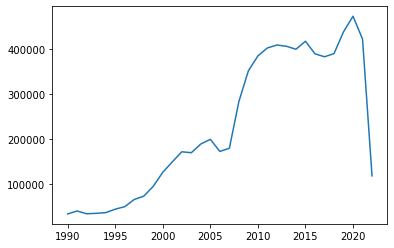

In [18]:
plt.plot(count_by_year)

In [19]:
count_by_year

year
1990     34164
1991     40652
1992     34518
1993     35446
1994     37018
1995     44674
1996     50278
1997     66225
1998     73578
1999     95489
2000    126662
2001    149686
2002    172166
2003    170057
2004    189479
2005    199809
2006    172941
2007    179968
2008    283643
2009    351961
2010    385099
2011    402735
2012    409196
2013    406490
2014    399798
2015    417658
2016    389792
2017    383122
2018    390077
2019    438463
2020    473152
2021    422527
2022    118657
Name: 일자, dtype: int64

In [24]:
data.groupby('city').count()['일자'].to_excel("../result/city_count.xlsx")

: 